In [2]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os

Read first waveform file (channel 0)

Schon alles umgewandelt in CSV am Versuchstag

In [3]:
# def read_data(infile):
#     with open(infile, 'rb') as f:
#         nevent = 0
#         notEOF = True
#         max_nevent = 1000000000
#         xList, eventList, tList, tDAQ, = [], [], [], []

#         print(infile)
        
#         while notEOF and nevent < max_nevent:
#             # read header: record, boardID, channel, pattern, event, time_ns
#             s = f.read(24)
#             if len(s) != 24:
#                 notEOF = False
#                 break
#             record, boardID, channel, pattern, event, time_ns = struct.unpack("<LLLLLL", s)
#             #print(record, boardID, channel, pattern, event, time_ns)

#             # read data: record = 24 (6*4Byte) header length 
#             #                       + Byte length of the waveform event (16 bit per sample)
#             s = f.read(record-24)
#             if len(s) != (record-24):
#                 notEOF = False
#                 break
#             format = "<"+str(int((record-24)/2))+"H"
#             #print(format)
#             data = struct.unpack(format, s)

#             # determine the baseline signal (average of first 10 samples)
#             x0 = 0
#             for i in range(10):
#                 x0 += data[i]
#             #x0 /= 10.

#             # find the maximum peak in the waveform event (sliding average of 10 samples)
#             imax = 0
#             xmax, xsum = 0., 0.
#             for i in range(10,int((record-24)/2)):
#                 xsum = xsum + data[i-10] - data[i]
#                 # xsum = data[i] - x0
#                 if xmax < xsum:
#                     xmax = xsum
#                     imax = i
#             xList.append(xmax)
#             eventList.append(event)
#             tList.append(imax * 8)
#             tDAQ.append(time_ns * 8)
#             nevent = nevent + 1
        
#         '''
#         nevent: Total number of events in this channel
#         xList: List with the signal amplitudes (generated from a sliding average)
#         eventList: List with event IDs
#         tList: List with the relative timestamps of the signal peaks within the trigger window
#         tDAQ: List with the absolute timestamps of the trigger windows within the whole DAQ period
#         '''
#         return nevent, xList, eventList, tList, tDAQ

# # Get list of files in current directory
# fileList = [x for x in os.listdir('.') if '.dat' in x]

# for file in fileList:
#     nevent0, xList0, eventList0, tList0,  tDAQ0 = read_data(file)
#     data_array_0 = np.transpose(np.array((xList0,eventList0,tList0,tDAQ0)))    
#     np.savetxt(file[0:-4]+".csv", data_array_0, delimiter=", ", header="ADC counts, event no., timestamp, absolute time")

## CSV Dateien entpacken
- erstelle für je den Untergrund, Natrium und Cobalt pro Detektor eine Liste (wave0, wave1), in die alle Dateien dieses Detektors kommen  
- Alle CSVs haben 4 Spalten mit Einträgen: # ADC Counts, event no., timestamp, absolute time  
- entpacken: gehe für jede Probe die Listen durch und erstelle eine Liste von den # ADC Counts Listen   

In [4]:
# background: 0, 45 deg
files0_bkg = ["wave0_bkg_0deg.csv", "wave0_bkg_45deg.csv"]
files1_bkg = ["wave1_bkg_0deg.csv", "wave1_bkg_45deg.csv"]

# Natrium
files0_na = ["wave0_na_0deg.csv"]
files1_na = ["wave1_na_0deg.csv"]

# Cobalt
files0_co = ["wave0_co_0deg_1.csv", "wave0_co_0deg_2.csv", "wave0_co_0deg_3.csv", "wave0_co_0deg_4.csv",
             "wave0_co_45deg_1.csv", "wave0_co_45deg_2.csv", "wave0_co_45deg_3.csv", "wave0_co_45deg_4.csv",
             "wave0_co_90deg_1.csv", "wave0_co_90deg_2.csv", "wave0_co_90deg_3.csv", "wave0_co_90deg_4.csv",
             ]
files1_co = ["wave1_co_0deg_1.csv", "wave1_co_0deg_2.csv", "wave1_co_0deg_3.csv", "wave1_co_0deg_4.csv",
             "wave1_co_45deg_1.csv", "wave1_co_45deg_2.csv", "wave1_co_45deg_3.csv", "wave1_co_45deg_4.csv",
             "wave1_co_90deg_1.csv", "wave1_co_90deg_2.csv", "wave1_co_90deg_3.csv", "wave1_co_90deg_4.csv",
             ]

# entpackte dateien
f0_bkg = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files0_bkg ]
f1_bkg = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files1_bkg ]
f0_na = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files0_na ]
f1_na = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files1_na ]
f0_co = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files0_co ]
f1_co = [ [np.loadtxt(file, unpack=True, skiprows=1, delimiter=",")][0] for file in files1_co ]

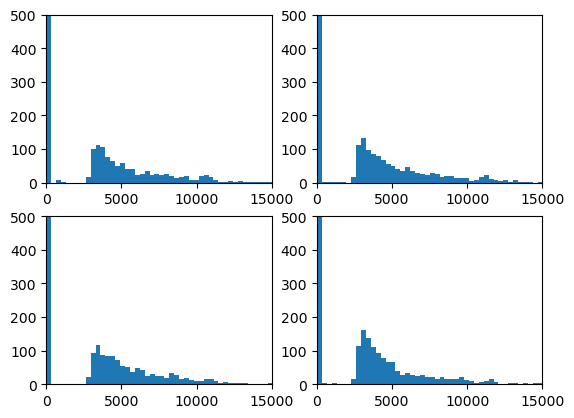

In [5]:
fig1, ax1 = plt.subplots(2,2)

for i in range(2):
    ax1[i][0].hist(f0_bkg[i][0], bins=500)
    ax1[i][1].hist(f1_bkg[i][0], bins=500)
    ax1[i][0].axis([0, 15000, 0, 500])
    ax1[i][1].axis([0, 15000, 0, 500])

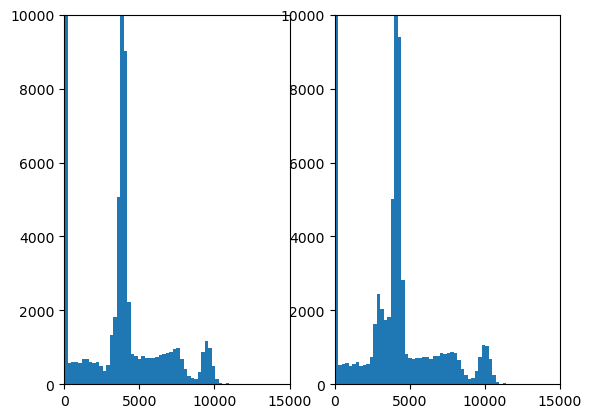

In [6]:
fig2, ax2 = plt.subplots(1,2)
ax2[0].hist(f0_na[0][0], bins=700)
ax2[1].hist(f1_na[0][0], bins=700)
ax2[0].axis([0, 15000, 0, 10000])
ax2[1].axis([0, 15000, 0, 10000])
plt.show()

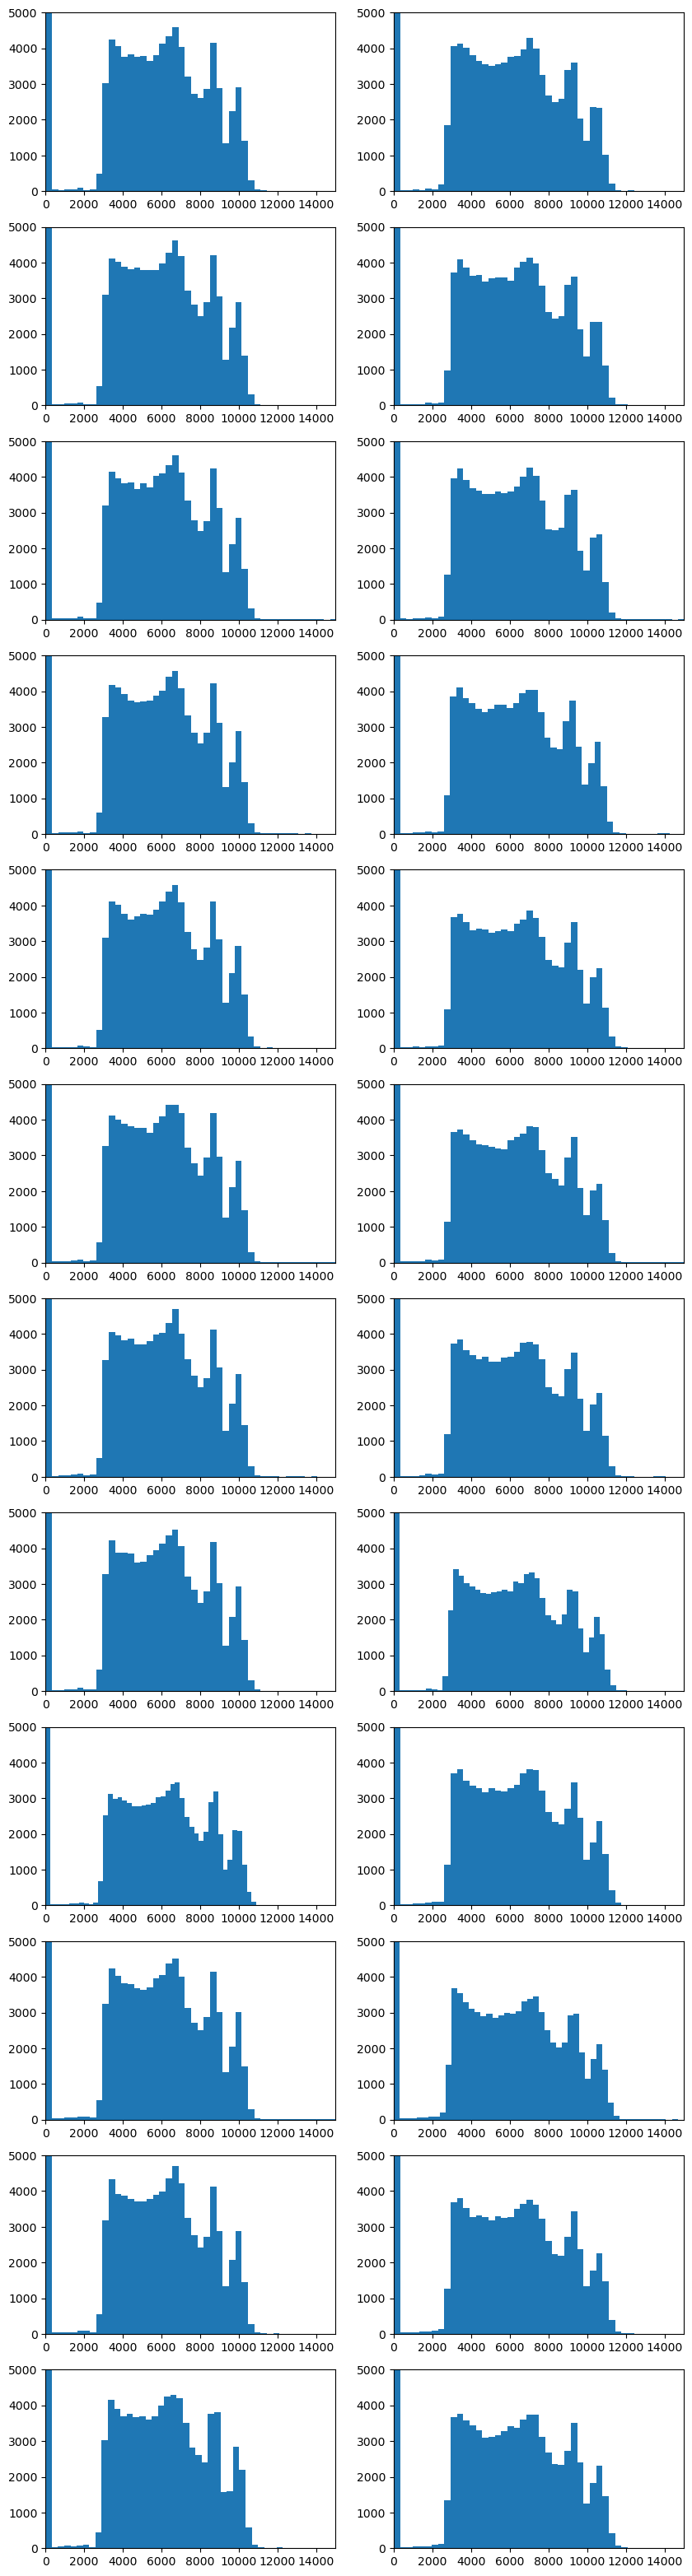

In [7]:
fig3, ax3 = plt.subplots(np.size(files0_co),2, figsize=(10,40))
for i in range(np.size(files0_co)):
    ax3[i][0].hist(f0_co[i][0], bins=500)
    ax3[i][1].hist(f1_co[i][0], bins=500)
    ax3[i][0].axis([0, 15000, 0, 5000])
    ax3[i][1].axis([0, 15000, 0, 5000])

### Plot histogram

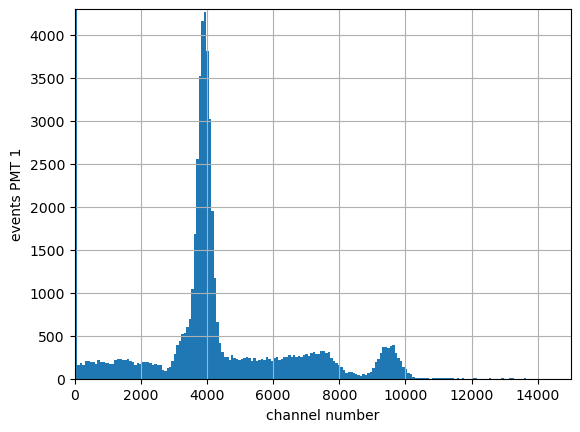

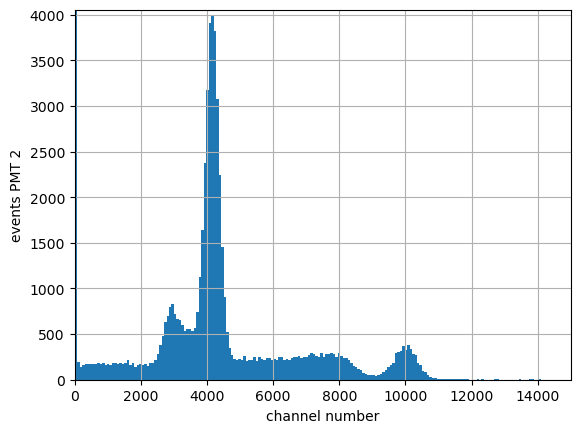

In [8]:
x1, bins1, patch = plt.hist(f0_na[0][0], bins=200, range=(0,15000))
bins1 = bins1[:-1]
plt.xlabel('channel number')
plt.ylabel('events PMT 1')
# ymax vorher 610
plt.axis([0, 15000, 0, 4300])
plt.grid(True)
#plt.savefig('raw1.pdf')
plt.show()

x2, bins2, patch = plt.hist(f1_na[0][0], bins=200, range=(0,15000))
bins2 = bins2[:-1]
plt.xlabel('channel number')
plt.ylabel('events PMT 2')
# ymax vorher 790
plt.axis([0, 15000, 0, 4050])
plt.grid(True)
#plt.savefig('raw2.pdf')
plt.show()


### TODO: calibration
* energy = m*channel + b
* fit the two photo-peaks in the Na-22 spectrum with a Gaussian shape (be careful, which are the right peaks)
* from that, deduce the index channel number corresponding to 60% of the second photo-peak of the Co-60 spectrum
* do this separately for both detectors

In [9]:
#define a gauss function with a normalisation constant A, mean mu and std sigma
def gauss(x,A,mu,std):
    return A*np.exp(-(x-mu)**2/(2*std**2))

This is a simple code block to fit a Gaussian to a part of the spectrum.

It should be carefully read to understand what the code does and results of the fit should not be used without reading the documentation of the fitting function and all of its return values.

### Detector 1

### First Peak
A = 4262.9 +- 50.8
mu = 3875.7  +- 2.8
std = 205.9 +- 2.9

### Second Peak
A = 393.2 +- 9.3
mu = 9459.7 +- 8.7
std = 313.0 +- 10.4


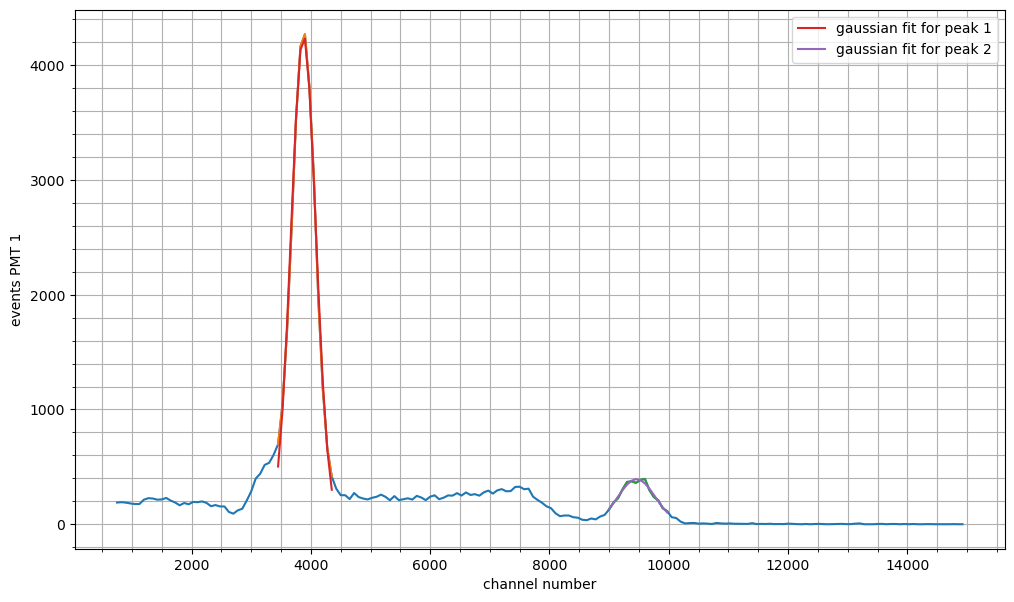

In [10]:
#define a fit range
n_start_1, n_stop_1 = int(3500/75),int(4450/75) 
n_start_2, n_stop_2 = int(9000/75),int(10100/75)

sample_x_1 = bins1[n_start_1:n_stop_1]
sample_y_1 = x1[n_start_1:n_stop_1]
sample_x_2 = bins1[n_start_2:n_stop_2]
sample_y_2 = x1[n_start_2:n_stop_2]

plt.figure(figsize=(12,7))
plt.plot(bins1[10:,],x1[10:,])
plt.plot(sample_x_1,sample_y_1)
plt.plot(sample_x_2,sample_y_2)

#make initial choice for fitting parameters wisely
param_1 = [60,4000,150]
param_2 = [8,9500,100]

fit_result_1 = opt.curve_fit(gauss, sample_x_1, sample_y_1, param_1)
fit_result_2 = opt.curve_fit(gauss, sample_x_2, sample_y_2, param_2)

print("### First Peak")
print(f"A = {str(round(fit_result_1[0][0],1))} +- {str(round(np.sqrt(fit_result_1[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_1[0][1],1))}  +- {str(round(np.sqrt(fit_result_1[1][1][1]),1))}")
print(f"std = {str(round(fit_result_1[0][2],1))} +- {str(round(np.sqrt(fit_result_1[1][2][2]),1))}")
print("")
print("### Second Peak")
print(f"A = {str(round(fit_result_2[0][0],1))} +- {str(round(np.sqrt(fit_result_2[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_2[0][1],1))} +- {str(round(np.sqrt(fit_result_2[1][1][1]),1))}")
print(f"std = {str(round(fit_result_2[0][2],1))} +- {str(round(np.sqrt(fit_result_2[1][2][2]),1))}")

fit_y_1 = [gauss(x,fit_result_1[0][0],fit_result_1[0][1],fit_result_1[0][2]) for x in sample_x_1]
fit_y_2 = [gauss(x,fit_result_2[0][0],fit_result_2[0][1],fit_result_2[0][2]) for x in sample_x_2]

plt.plot(sample_x_1, fit_y_1, label='gaussian fit for peak 1')
plt.plot(sample_x_2, fit_y_2, label='gaussian fit for peak 2')
plt.legend()
plt.xlabel('channel number')
plt.ylabel('events PMT 1')
plt.grid()
plt.grid(which="minor")
plt.minorticks_on()

#plt.axis([0, 0, 0, 0])
#plt.savefig("fit1.pdf")
plt.show()

### Detector 2

### First Peak
A = 3992.4 +- 54.3
mu = 4116.5  +- 3.5
std = -222.9 +- 3.6

### Second Peak
A = 363.6 +- 10.3
mu = 9966.4 +- 11.7
std = 349.2 +- 14.6


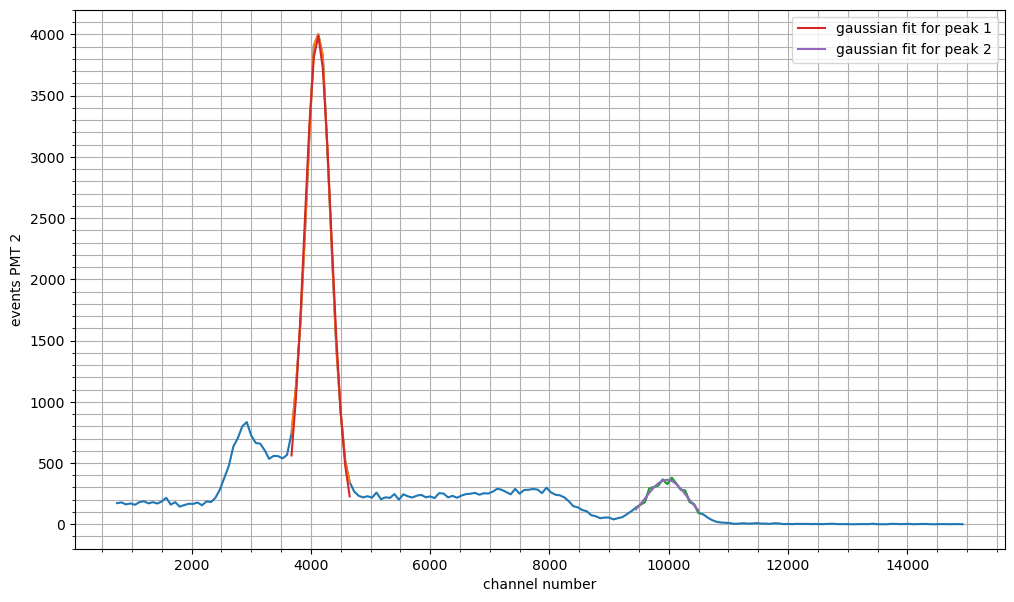

In [11]:
n_start_3, n_stop_3 = int(3700/75),int(4750/75)  
n_start_4, n_stop_4 = int(9500/75),int(10600/75)

sample_x_3 = bins2[n_start_3:n_stop_3]
sample_y_3 = x2[n_start_3:n_stop_3]
sample_x_4 = bins2[n_start_4:n_stop_4]
sample_y_4 = x2[n_start_4:n_stop_4]

plt.figure(figsize=(12,7))
plt.plot(bins2[10:,],x2[10:,])
plt.plot(sample_x_3,sample_y_3)
plt.plot(sample_x_4,sample_y_4)

param_3 = [60,4100,150]
param_4 = [8,10000,100]

fit_result_3 = opt.curve_fit(gauss, sample_x_3, sample_y_3, param_3)
fit_result_4 = opt.curve_fit(gauss, sample_x_4, sample_y_4, param_4)

print("### First Peak")
print(f"A = {str(round(fit_result_3[0][0],1))} +- {str(round(np.sqrt(fit_result_3[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_3[0][1],1))}  +- {str(round(np.sqrt(fit_result_3[1][1][1]),1))}")
print(f"std = {str(round(fit_result_3[0][2],1))} +- {str(round(np.sqrt(fit_result_3[1][2][2]),1))}")
print("")
print("### Second Peak")
print(f"A = {str(round(fit_result_4[0][0],1))} +- {str(round(np.sqrt(fit_result_4[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_4[0][1],1))} +- {str(round(np.sqrt(fit_result_4[1][1][1]),1))}")
print(f"std = {str(round(fit_result_4[0][2],1))} +- {str(round(np.sqrt(fit_result_4[1][2][2]),1))}")

fit_y_3 = [gauss(x,fit_result_3[0][0],fit_result_3[0][1],fit_result_3[0][2]) for x in sample_x_3]
fit_y_4 = [gauss(x,fit_result_4[0][0],fit_result_4[0][1],fit_result_4[0][2]) for x in sample_x_4]

plt.plot(sample_x_3, fit_y_3, label='gaussian fit for peak 1')
plt.plot(sample_x_4, fit_y_4, label='gaussian fit for peak 2')
plt.legend()
plt.xlabel('channel number')
plt.ylabel('events PMT 2')
plt.grid()
plt.grid(which="minor")
plt.minorticks_on()

#plt.axis([0, 0, 0, 0])
# plt.savefig("fit2.pdf")
plt.show()

### Do the energy calibration to determine the 60% (maybe higher is better?) threshold

using E = m*channel + b

In [12]:
channel_peak_1 = fit_result_1[0][1]
channel_peak_2 = fit_result_2[0][1]

E_1, E_2 = 0.511, 1.275 #Energies in MeV for Na-22

E_Co = 1.332 #Energy in MeV of the second photo-peak of Co-60

m1 = (E_2 - E_1)/(channel_peak_2 - channel_peak_1)
b1 = (channel_peak_2 * E_1 - channel_peak_1 * E_2)/(channel_peak_2 - channel_peak_1)

print(f"m1 = {round(m1,7)} MeV/channel")
print(f"b1 = {round(b1,4)} MeV")

ch_threshold1 = (0.6 * E_Co - b1)/m1

print(f"60% of the second peak's energy equals to channel number {ch_threshold1}")
print()

channel_peak_3 = fit_result_3[0][1]
channel_peak_4 = fit_result_4[0][1]

m2 = (E_2 - E_1)/(channel_peak_4 - channel_peak_3)
b2 = (channel_peak_4 * E_1 - channel_peak_3 * E_2)/(channel_peak_4 - channel_peak_3)

print(f"m2 = {round(m2,7)} MeV/channel")
print(f"b2 = {round(b2,4)} MeV")

ch_threshold2 = (0.6 * E_Co - b2)/m2

print(f"60% of the second peak's energy equals to channel number {ch_threshold2}")

m1 = 0.0001368 MeV/channel
b1 = -0.0193 MeV
60% of the second peak's energy equals to channel number 5982.141495013449

m2 = 0.0001306 MeV/channel
b2 = -0.0266 MeV
60% of the second peak's energy equals to channel number 6323.234447354643


### Search for coincidences in the Co-60 data

xList1, eventList1, tList1, tDAQ1 entsprechen den Spalten der wave0 CSVs (analog mit 2: wave1)

- xList: ADC Counts  
- eventList: event no.  
- tList: timestamps  
- tDAQ: absolute time

In [13]:
xList1 = f0_co[9][0]
xList2 = f1_co[9][0]
eventList1 = f0_co[9][1]
eventList2 = f1_co[9][1]
tList1 = f0_co[9][2]
tList2 = f1_co[9][2]
tDAQ1 = f0_co[9][3]
tDAQ2 = f1_co[9][3]

In [14]:
print(len(xList1), len(tDAQ1), len(tDAQ2)) #to avoid further errors

coinc1, eCoinc1, tCoinc1 = [], [], []
coinc2, eCoinc2, tCoinc2 = [], [], []
dtCoinc, eSum = [], []
eRandCoinc1 = []

# check for equal number of entries
if len(xList1) != len(xList2):
    print("Warning: different event numbers")

for i in range(len(xList1)):
    # absolute times of the entries should be the same between the two detectors
    if tDAQ1[i] != tDAQ2[i]:
        print("different times in event ",i)

    # if both detectors detect a signal above their respective 60% thresholds between 200ms and 400ms from each other, then we have detected
    # a randomly coincident signal
    if abs(tList1[i] - tList2[i]) > 200 and abs(tList1[i] - tList2[i]) < 400 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
        eRandCoinc1.append(xList1[i])

    # if both detectors detect a signal above their respective 60% thresholds within 100ms, then we have detected a coincidental signal
    if abs(tList1[i] - tList2[i]) < 100 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
        
        coinc1.append(eventList1[i]) 
        eCoinc1.append(xList1[i]) 
        tCoinc1.append(tList1[i])
        
        coinc2.append(eventList2[i])
        eCoinc2.append(xList2[i]) 
        tCoinc2.append(tList2[i])
        
        dtCoinc.append(tList1[i]-tList2[i])
        eSum.append(xList1[i]+xList2[i])

nCoinc = len(eCoinc1)
nRandCoinc = len(eRandCoinc1)

n1 = len([x for x in xList1 if x>int(ch_threshold1)]) # total number of events above the threshold
n2 = len([x for x in xList2 if x>int(ch_threshold2)])

print(f"Number of events PMT 0:      {n1}")
print(f"Number of events PMT 1:      {n2}")
print(f"Number of coincident events: {nCoinc}")
print(f"Number of randomly coincident events: {nRandCoinc}")

154092 154092 154092
Number of events PMT 0:      42588
Number of events PMT 1:      39623
Number of coincident events: 57
Number of randomly coincident events: 1


In [15]:
# Make the above code into a funtion for reusability
def coincidence(det1, det2, count, deg):
    """
    det1, det2: Array of exactly 4 arrays, those arrays being:
        1. ADC Counts, called xList
        2. event no., called eventList
        3. timestamps, called tList
        4. absolute time, called tDAQ
    count: int, which measurement round (1st, 2nd, 3rd or 4th)
    deg: int, angle between detectors (0, 45, 90)
    """

    xList1, xList2 = det1[0], det2[0]
    eventList1, eventList2 = det1[1], det2[1]
    tList1, tList2 = det1[2], det2[2]
    tDAQ1, tDAQ2 = det1[3], det2[3]

    print(len(xList1), len(tDAQ1), len(tDAQ2)) #to avoid further errors

    coinc1, eCoinc1, tCoinc1 = [], [], []
    coinc2, eCoinc2, tCoinc2 = [], [], []
    dtCoinc, eSum = [], []
    eRandCoinc1 = []

    # check for equal number of entries
    if len(xList1) != len(xList2):
        print("Warning: different event numbers")

    for i in range(len(xList1)):
        # absolute times of the entries should be the same between the two detectors
        if tDAQ1[i] != tDAQ2[i]:
            print("different times in event ",i)

        # if both detectors detect a signal above their respective 60% thresholds between 200ms and 400ms from each other, then we have detected
        # a randomly coincident signal
        if abs(tList1[i] - tList2[i]) > 200 and abs(tList1[i] - tList2[i]) < 400 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
            eRandCoinc1.append(xList1[i])

        # if both detectors detect a signal above their respective 60% thresholds within 100ms, then we have detected a coincidental signal
        if abs(tList1[i] - tList2[i]) < 100 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
            
            coinc1.append(eventList1[i]) 
            eCoinc1.append(xList1[i]) 
            tCoinc1.append(tList1[i])
            
            coinc2.append(eventList2[i])
            eCoinc2.append(xList2[i]) 
            tCoinc2.append(tList2[i])
            
            dtCoinc.append(tList1[i]-tList2[i])
            eSum.append(xList1[i]+xList2[i])

    nCoinc = len(eCoinc1)
    nRandCoinc = len(eRandCoinc1)

    n1 = len([x for x in xList1 if x>int(ch_threshold1)]) # total number of events above the threshold
    n2 = len([x for x in xList2 if x>int(ch_threshold2)])

    print(f"{deg}°, round {count}")
    print(f"Number of events PMT 0:      {n1}")
    print(f"Number of events PMT 1:      {n2}")
    print(f"Number of coincident events: {nCoinc}")
    print(f"Number of randomly coincident events: {nRandCoinc} \n")

    # return nRandCoinc / (n1*n2)
    return n1, n2, nCoinc, nRandCoinc


In [16]:
degCount = np.array([ (1,0) , (2,0) , (3,0) , (4,0) ,
                      (1,45) , (2,45) , (3,45) , (4,45) ,
                      (1,90) , (2,90) , (3,90) , (4,90)
                    ])
N1 = []
N2 = []
NCoinc = []
NRand = []

for i in range(len(degCount)):
    n1, n2, nCoinc, nRandCoinc = coincidence(f0_co[i], f1_co[i], degCount[i][0], degCount[i][1])
    N1.append(n1)
    N2.append(n2)
    NCoinc.append(nCoinc)
    NRand.append(nRandCoinc)

n1_bkg1, n2_bkg1, nCoinc_bkg1, nRandCoinc_bkg1 = coincidence(f0_bkg[0], f1_bkg[0], 0, 0)
n1_bkg2, n2_bkg2, nCoinc_bkg2, nRandCoinc_bkg2 = coincidence(f0_bkg[1], f1_bkg[1], 0, 45)

N1_bkg = [n1_bkg1, n1_bkg2]
N2_bkg = [n2_bkg1, n2_bkg2]
NCoinc_bkg = [nCoinc_bkg1, nCoinc_bkg2]
NRand_bkg = [nRandCoinc_bkg1, nRandCoinc_bkg2]

# Koinzidenzrate in der Hintergrundmessung
N_Kbkg = np.mean(NCoinc_bkg)
# Mittelwert der Gesamtraten in der Hintergrundmessung 
# bei je einem Detektor
N1_bkg = np.mean(N1_bkg)
N2_bkg = np.mean(N2_bkg)

# N1 = np.sum(N1)
# N2 = np.sum(N2)
# NRand = np.sum(NRand)

# tau = NRand / (N1*N2)

161442 161442 161442
0°, round 1
Number of events PMT 0:      42740
Number of events PMT 1:      42459
Number of coincident events: 57
Number of randomly coincident events: 0 

159845 159845 159845
0°, round 2
Number of events PMT 0:      42983
Number of events PMT 1:      42368
Number of coincident events: 84
Number of randomly coincident events: 0 

160578 160578 160578
0°, round 3
Number of events PMT 0:      43084
Number of events PMT 1:      42255
Number of coincident events: 72
Number of randomly coincident events: 0 

160215 160215 160215
0°, round 4
Number of events PMT 0:      43052
Number of events PMT 1:      42045
Number of coincident events: 78
Number of randomly coincident events: 0 

153816 153816 153816
45°, round 1
Number of events PMT 0:      42709
Number of events PMT 1:      39500
Number of coincident events: 64
Number of randomly coincident events: 1 

154308 154308 154308
45°, round 2
Number of events PMT 0:      42837
Number of events PMT 1:      39500
Number of 

Berechnung der bereinigten Koinzidenzraten für jeden Winkel und jede Messung:
Von der gemessenen Koinzidenzrate werden die Hintergrund-Koinzidenzrate und die zufäligen Koinzidenzen abgezogen. Dann wird durch die, auf den Hintergrund bereinigte, Gesamtzählrate geteilt. 
$$R(\vartheta) = \frac{N_K - N_{K, bkg} - N_Z}{ (N_{PMT1} - N_{bkg}) \cdot (N_{PMT2} - N_{bkg}) }$$

In [17]:
rate_theta = []
for i in range(len(degCount)):
    N_K = NCoinc[i]
    N_Z = NRand[i]
    N_PMT1, N_PMT2 = N1[i], N2[i]

    rate_theta.append( ( N_K - N_Kbkg - N_Z ) / ( (N_PMT1-N1_bkg) * (N_PMT2-N2_bkg) ) )

print(rate_theta)
print(np.size(rate_theta))

[3.180591167574662e-08, 4.683784551093664e-08, 4.011965879575746e-08, 4.37386027994663e-08, 3.787549257320495e-08, 3.776103268442012e-08, 3.808621918713908e-08, 3.607659564508803e-08, 4.2060276152201963e-08, 3.3624250754758406e-08, 3.299083399617669e-08, 3.4467175116843126e-08]
12


### Resolving coincidence time

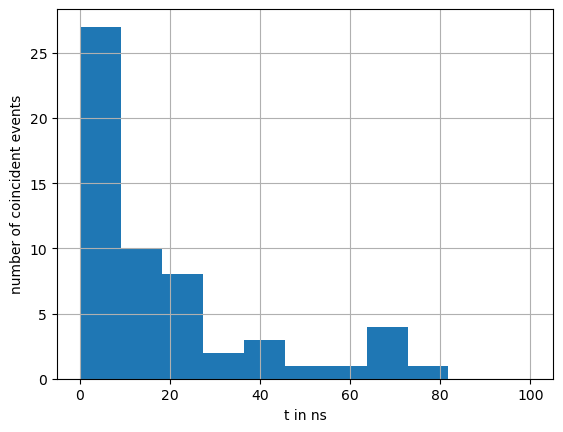

In [25]:
plt.hist(np.abs(dtCoinc), bins=11, range=(0,100))
# plt.axis([-0, 0, 0, 0])
plt.grid(True)
plt.xlabel("t in ns")
plt.ylabel("number of coincident events")
# plt.savefig("hist_coin_time.pdf")
plt.show()

In [26]:
# Berechnung der Korrelation
# K(theta) = K(Theta) / K(0°)
N0 = 